In [1]:
import os

import torch
import torch.nn as nn;
import matplotlib.pyplot as plt

from torch.utils.data import dataloader
from torchvision.models import efficientnet_v2_s, EfficientNet_V2_S_Weights
from torchvision.datasets import Food101
from torchvision.transforms import transforms

from modelpipe import DataPipeLine
from modelpipe import PretrainedBaseModel


In [ ]:
dpl = DataPipeLine(Food101, path=ds_path)
train = dpl.download()
trainset = dpl.trainDatasetInstance

In [2]:
os.chdir("..")
root_path = os.getcwd()
ds_path = os.path.join(root_path, "datasets")
ds_path

'c:\\Users\\amany\\OneDrive\\Desktop\\projects\\genAi\\VitModel\\Main\\datasets'

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
pretrained_model = efficientnet_v2_s(weights=EfficientNet_V2_S_Weights.IMAGENET1K_V1)

In [21]:
class PretrainedBaseModel(nn.Module):
    def __init__(self, pretrained_model:nn.Module, freeze_model=True):
        super(PretrainedBaseModel, self).__init__()
        self.pt_model = pretrained_model
        self.model = self.pt_model.features

        if freeze_model:
            self.freeze();

    def freeze(self):
        for params in self.model.parameters():
            params.requires_grad = False
        self.model.eval() #to prevent batchnorm running -stats(mean & std) update (?)

    def forward(self, x):
        return self.model(x)


In [5]:
base_model = PretrainedBaseModel(pretrained_model)

In [ ]:
x, y = trainset[0]

In [10]:
x = x.view(1, *x.shape)
x.shape

torch.Size([1, 3, 512, 512])

In [11]:
op = base_model(x)
op.shape

torch.Size([1, 1280, 16, 16])

TypeError: 'Figure' object is not callable

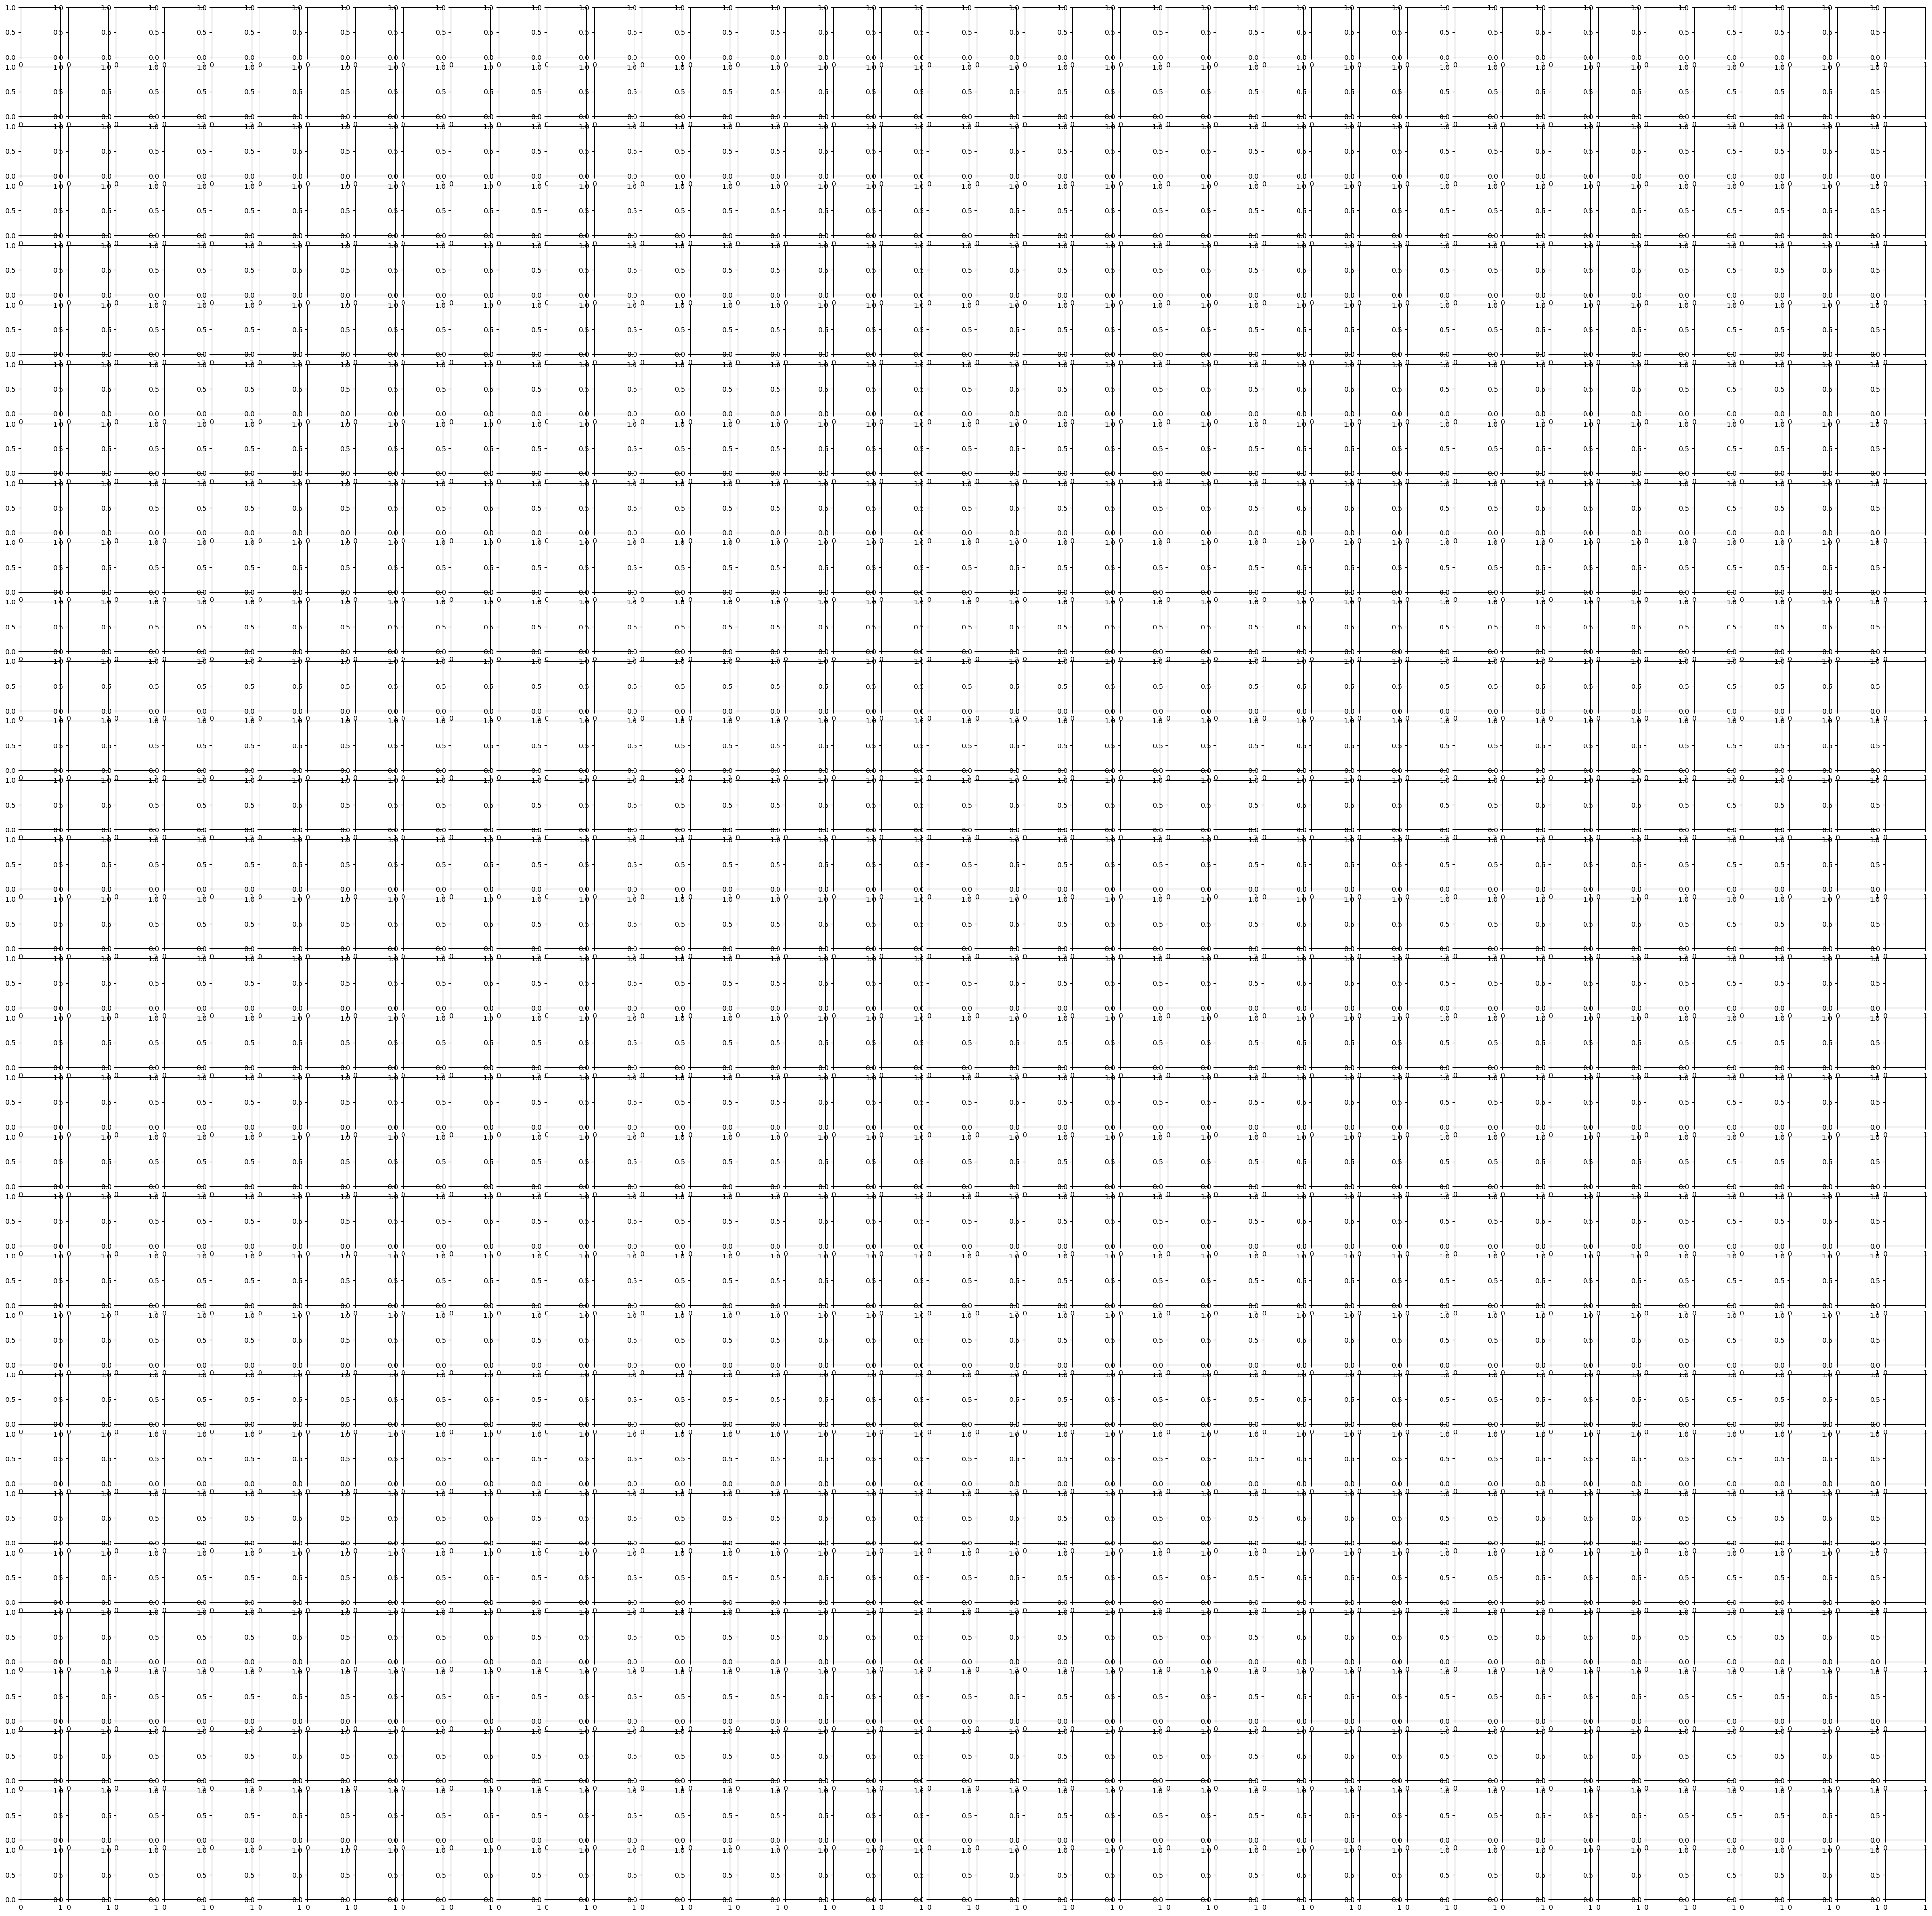

In [22]:

fig, axes = plt.subplots(32, 40, figsize=(50, 50))

for ax, img in zip(axes.flatten(), op[0]):
    ax.imshow(img)
    ax.axis("off")

plt.show()
plt.axis("off")
plt.tight_layout()